In [59]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [60]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [61]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [62]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [63]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [64]:
# View all of the classes that automap found
Measurement = Base.classes.measurement
Station = Base.classes.station

In [65]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [66]:
# Print all of the classes mapped to the Base
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [67]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [68]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

In [69]:
# Calculate the date one year from the last date in data set.
date_one_year_From_lastDate = dt.date(2017,8,23) - dt.timedelta(days=365)
print(date_one_year_From_lastDate)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23', Measurement.date <= '2017-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date

df = pd.DataFrame(data, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)
df=df.sort_values(by='date')
df.head()




2016-08-23


,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


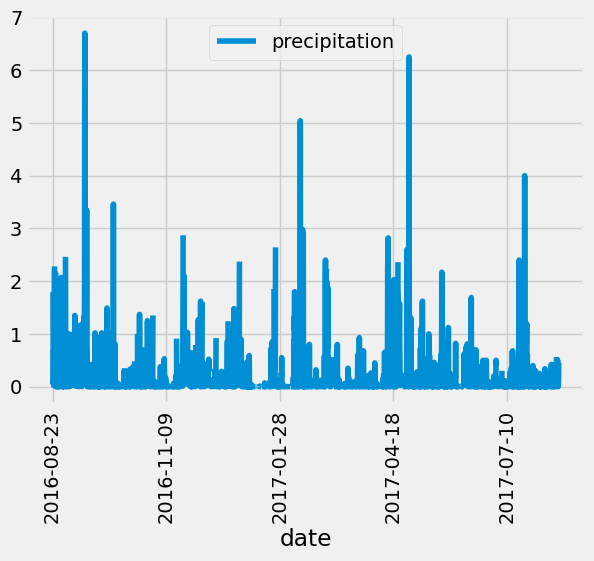

In [70]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot()
plt.legend()
plt.xticks(rotation = 90)
plt.show()

In [71]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [72]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [73]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

Most_Active_Station = session.query(Station.station, func.count(Measurement.tobs)).join(Measurement, Station.station==Measurement.station).group_by(Station.station).order_by(func.count(Measurement.tobs).desc()).all()
Most_Active_Station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [74]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Most_Active_StationID = Most_Active_Station[0][0]
Most_Active_StationQuery = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
session.query(*Most_Active_StationQuery).filter(Measurement.station == Most_Active_StationID).all()

[(54.0, 85.0, 71.66378066378067)]

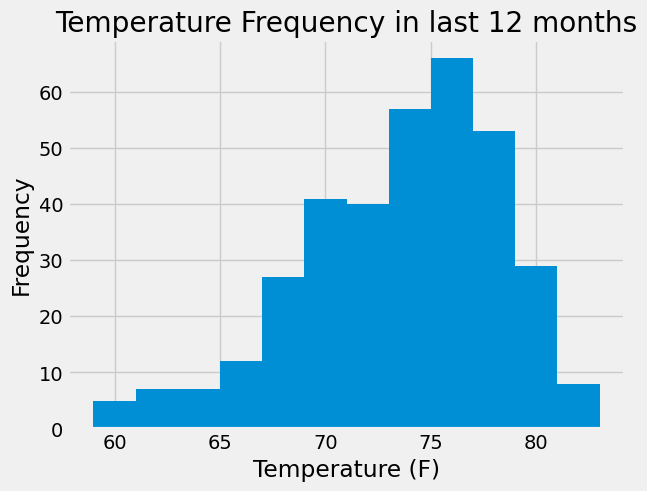

In [75]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Most_Active_StationID = Most_Active_Station[0][0]

# Setting query paramaters of Date and the Tempature
Most_Active_StationQueryNew = [Measurement.date, Measurement.tobs]

end_date_preformat = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0] # Date is in first index of the tuple
end_date = dt.datetime.strptime(end_date_preformat,'%Y-%m-%d')

# Preforming the query with the filter that the station is the one that was identified to be the most active and dates in a range
data_new = session.query(*Most_Active_StationQueryNew).filter(Measurement.station == Most_Active_StationID).filter(Measurement.date >= date_one_year_From_lastDate).filter(Measurement.date <= end_date).all()

# Converting the data to a Pandas Data Frame
pd_temp = pd.DataFrame([{"Date":result[0], "Tempature":result[1]} for result in data_new])

# Setting the plotting parameters of the plot
ax = pd_temp.plot(kind = 'hist', bins = 12,title = 'Temperature Frequency in last 12 months',xlabel = 'Temperature (F)',legend = False)



# Close Session

In [76]:
# Close Session
session.close()